# Project :  
### Airbnb price and its relation to factors like neighborhood safety, travel time to tourist spots and other geolocation factors 

------------------

### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Introduction </a></li>
        <li><a href="#ref2">Data Cleaning</a></li>
        <ul>
         <li><a href="#ref3">Handling Missing Data</a></li>
            <ul>
                <li><a href="#ref4">Checking for Missing Values</a></li>
                <li><a href="#ref4">Removing NaN and Zero values</a></li>
            </ul>
        <li><a href="#ref4">Data Transformations</a></li>
        </ul>
        <li><a href="#ref5">Exploratory Data Analysis</a></li>
            <ul>
        <li><a href="#ref6">Correlation heatmap</a></li>
                <li><a href="#ref6">Finding neighbourhood with highest average prices of airbnb</a></li>
                <li><a href="#ref6">Comparing neighbourhoods with respect to average price of airbnb</a></li>
        </ul>
        <li><a href="#ref7">Model /Methodology</a></li>
        <li><a href="#ref7">Results</a></li>
        <li><a href="#ref8">Discussion section</a></li>
        <li><a href="#ref9">Conclusion section</a></li>
    </ol>
</div>
<br>

# 1. Introduction

This dataset is unclean and requires lot of manual cleaning :
1. We need to take of missing values
2. We need to take care that data is consistent
3. We need to perform some trasnformations
4. We have lot features which are not use full for our purpose hence we will remove such features

**The project is not ready yet, requires lot of data cleaning and data integrations with crime and MTA dataset**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

####   Upon lot of manual search selected these columns for further analysis 

In [2]:
column=['id','host_id','neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price',
        'number_of_reviews','review_scores_rating','host_listings_count','availability_30','minimum_nights']
# reading csv in to a dataframe
df=pd.read_csv("Data/listings.csv",usecols=column)
#print top 5 elements of dataframe
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,3647,4632,1.0,Harlem,Manhattan,10027,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,$150.00,3,30,0,NaN
1,3831,4869,1.0,Clinton Hill,Brooklyn,11238,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,$89.00,1,1,279,90.0
2,5022,7192,1.0,East Harlem,Manhattan,10029,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,$80.00,10,0,9,93.0
3,5099,7322,1.0,Murray Hill,Manhattan,10016,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$200.00,3,3,75,89.0
4,5121,7356,1.0,Bedford-Stuyvesant,Brooklyn,11216,Apartment,Private room,2,NaN,1.0,1.0,Futon,$60.00,45,0,49,90.0


# 2. Data Cleaning

## 2.1 Handling Missing Values

#### <font color='#120c82'> 2.1.1 Checking for Missing Values <font>

In [3]:
print("Number of rows in Dataframe are",df.shape[0])
print("Number of columns in Dataframe are",df.shape[1])
print("Number of missing values are :- ")
# Checking for missing values per column
df.isnull().sum(axis = 0)

Number of rows in Dataframe are 48377
Number of columns in Dataframe are 18
Number of missing values are :- 


id                                  0
host_id                             0
host_listings_count                21
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
zipcode                           471
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          48
bedrooms                           41
beds                               36
bed_type                            0
price                               0
minimum_nights                      0
availability_30                     0
number_of_reviews                   0
review_scores_rating            10561
dtype: int64

#### 2.1.2 Removing NaN and Zero values 
1. Removing missing values 
2. Removing values which cannot be zero like price etc

In [4]:
#droping data of "subset" if subset has nan values
df = df.dropna(how='any', subset=['host_listings_count','zipcode', 'bathrooms', 'bedrooms', 'beds'])
#replacing nan of "review_scores_rating" with "No reviews"
df['review_scores_rating']=df['review_scores_rating'].replace(np.nan,"No reviews")
# Removing where "accommodates,bedrooms,beds"  have 0 value
df = df[df['accommodates'] != 0]
df = df[df['bedrooms'] != 0]
df = df[df['beds'] != 0]

##   2.2 Data Transformations
1. Changing price to float
2. Zipcode is inconsistent makign it consistent

In [5]:
# price and zipcode are inconsistent and are not in required format
# using str.replace to get rid of '$' and ',' and then convertng to float
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)
df = df[df['price'] != 0.00]
df['zipcode'] = df['zipcode'].str.replace(r'-\d+', '')
print("Number of rows in Dataframe are",df.shape[0])
print("Number of columns in Dataframe are",df.shape[1])
#putting price as last column
price=df['price']
df=df.drop("price",axis=1)
df['price']=price
df.head()


Number of rows in Dataframe are 42526
Number of columns in Dataframe are 18


,id,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,availability_30,number_of_reviews,review_scores_rating,price
0,3647,4632,1.0,Harlem,Manhattan,10027,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,3,30,0,No reviews,150.0
1,3831,4869,1.0,Clinton Hill,Brooklyn,11238,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,1,1,279,90,89.0
3,5099,7322,1.0,Murray Hill,Manhattan,10016,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,3,3,75,89,200.0
5,5178,8967,1.0,Hell's Kitchen,Manhattan,10019,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,2,1,443,83,79.0
6,5203,7490,1.0,Upper West Side,Manhattan,10025,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,2,0,118,98,79.0


# 3. Exploratory Data Analysis

Let us start by checking correlations

###  Plot - 1 Correlation heatmap

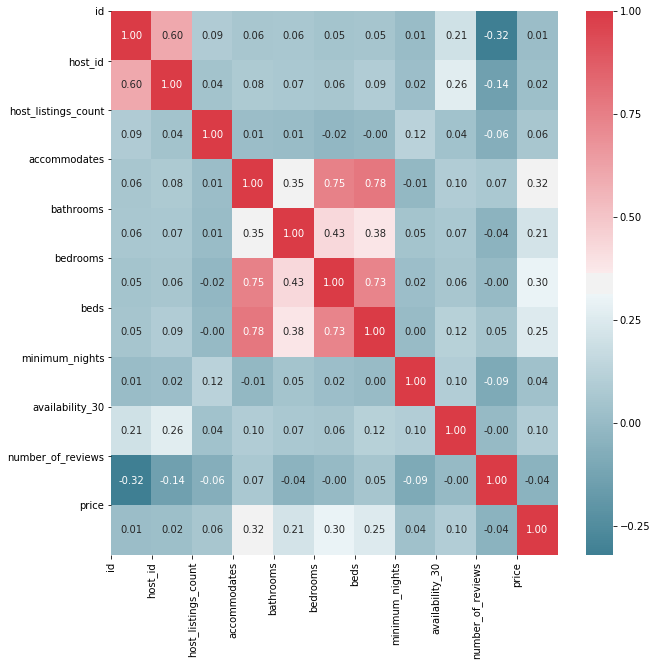

In [6]:
def heatMap(df):
    #create Correlation matrix
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    colormap = sb.diverging_palette(220, 10, as_cmap=True)
    #generating Heat Map
    sb.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(df)

###  <font color='red'>Price is somewhat correlated to "accomodates and bedrooms" need to do further cleaning, normalization, need to break neighbourhoods into dummy variables</font>

### Plot - 2 Finding neighbourhood with highest average prices of airbnb

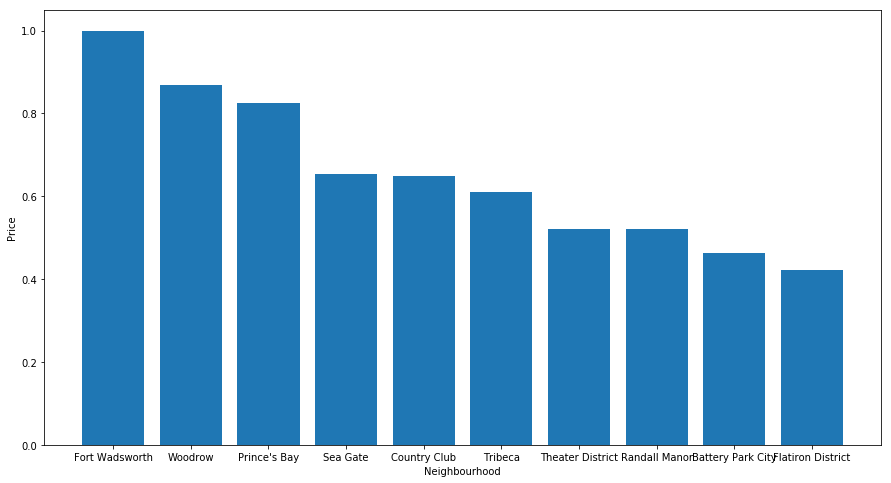

In [7]:
from sklearn import preprocessing
#creating a new df -> df2 for measuring average price per neighbourhood
df2=df[['neighbourhood_cleansed','price']]
df2=df2.groupby('neighbourhood_cleansed').mean()
df2=df2.reset_index()
# scaling the price 
x = df2['price'].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
df2['price'] = min_max_scaler.fit_transform(x)
df3=df2.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(15,8))
plt.bar(df3['neighbourhood_cleansed'][:10],df3["price"][:10])
plt.ylabel("Price")
plt.xlabel("Neighbourhood")
plt.show()


###  Plot - 3 Comparing neighbourhoods with respect to average price of airbnb

In [8]:
import folium
#importing geojson file provided by inside airbnb
world_geo = r'Data/neighbourhoods.geojson' # geojson file
# configuring initial location of map
world_map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

In [9]:
world_map.choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['neighbourhood_cleansed', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Avg price of airbnb in NYC'
)

# display map
world_map

#### a. We observe that some airbnb's in staten island have more price
#### b. Airbnb in manhattan are have higher prices than Brooklyn and Queens in general

## Map is not shown in github, hence putting screenshot of map (can be verified by running)

<img src="map.png">

-------------------

# 4. Model/ Methodology

In [10]:
#Todo

# 5. Result

In [11]:
#Todo

# 6. Discussion Section

In [12]:
#Todo

# 7. Conclusion Section

In [13]:
#Todo